In [7]:
import FFTW

using Interact
using PyPlot

HTML{String}("    <script id=\"webio-setup-17734168009364797528\">\n    // Immediately-invoked-function-expression to avoid global variables.\n    (function() {\n        var warning_div = document.getElementById(\"webio-warning-10171414320718432195\");\n        var hide = function () {\n            var script = document.getElementById(\"webio-setup-17734168009364797528\");\n            var parent = script && script.parentElement;\n            var grandparent = parent && parent.parentElement;\n            if (grandparent) {\n                grandparent.style.display = \"none\";\n            }\n            warning_div.style.display = \"none\";\n        };\n        if (window.require && require.defined) {\n            // Jupyter notebook.\n            if (require.defined(\"nbextensions/webio/main\")\n                    || require.defined(\"/assetserver/9093b8cc8b7907b7b9e649a9d83d7b6984e8ee13-dist/main.js\")) {\n                // Extension already loaded.\n                hide();\n                return;\n            }\n            console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n            require([\"/assetserver/9093b8cc8b7907b7b9e649a9d83d7b6984e8ee13-dist/main.js\"], function (webIOModule) {\n                webIOModule.load_ipython_extension();\n            });\n            warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n        } else if (window.location.pathname.includes(\"/lab\")) {\n            // Guessing JupyterLab\n            warning_div.innerHTML = \"WebIO does not support JupyterLab yet.\";\n        }\n    })();\n    </script>\n    <div\n        id=\"webio-warning-10171414320718432195\"\n        class=\"output_text output_stderr\"\n        style=\"padding: 1em; font-weight: bold;\"\n    >\n        Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n        <!-- TODO: link to installation docs. -->\n    </div>\n")

In [108]:
# Solve a 1D Poisson equation ∇²ϕ = d²ϕ/dx² = f(x) with periodic boundary conditions and grid spacing Δx
# using a second-order Fourier-spectral method.
function solve_poisson_1d_pbc(f, Δx)
    N = length(f)  # Number of grid points.
    n = 0:N        # Wavenumber indices.
    
    # k² = @. (4 / Δx^2) * sin(π*n / N)^2  # Wavenumber squared.
    k² = @. ((2*π / 12) * n)^2
    
    # Forward transform the real-valued source term.
    fh = FFTW.rfft(f)
    
    # Calculate the Fourier coefficients of the source term.
    # We only need to compute the first (N-1)/2 + 1 Fourier coefficients
    # as ϕh(N-i) = ϕh(i) for a real-valued f.
    ϕh = - fh ./ k²[1:Int(N/2 + 1)]
    
    # Setting the DC/zero Fourier component to zero.
    ϕh[1] = 0
    
    # Take the inverse transform of the . We need to specify that the input f
    # had a length of N+1 as 
    ϕ = FFTW.irfft(ϕh, N)
end

solve_poisson_1d_pbc (generic function with 1 method)

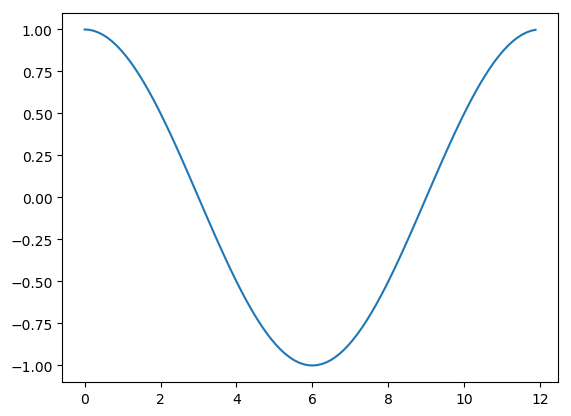

In [83]:
H = 12
Nz = 100
Δz = H / Nz
z = Δz * (0:(Nz-1))

f = cos.(2*π*z ./ H)
ϕs = -(H / (2π))^2 * cos.((2π / H) .* z)

PyPlot.plot(z, f);

In [84]:
fh = FFTW.rfft(f)

51-element Array{Complex{Float64},1}:
 -2.6645352591003757e-15 + 0.0im                   
                    50.0 - 4.533509791047258e-15im 
   -2.29527681353744e-15 - 4.4356721081793526e-15im
  2.8878224431804872e-15 - 3.88157458140812e-15im  
   5.366937815981507e-15 + 2.3000803655732416e-15im
 -1.2891812564629638e-15 - 2.4218730928321553e-16im
 -2.4927320736835633e-15 - 4.547266848879591e-16im 
  -2.195846040186857e-17 + 2.350997288907644e-16im 
   1.605578720172921e-16 - 1.211658251011312e-15im 
  4.0400128819420574e-15 + 1.9586377435532932e-15im
    9.13656946627439e-17 + 1.3869316562667265e-15im
 -1.1658071396441137e-15 + 1.295949624633798e-16im 
   -6.88405064177565e-16 - 2.554762762188651e-16im 
                         ⋮                         
 -2.5125022304515263e-15 + 8.02419359486236e-16im  
  -9.733570534991373e-16 - 3.377707704043929e-15im 
  2.5125022304515263e-15 - 2.890652065502909e-15im 
  1.5268733983023799e-15 + 3.2071562320802228e-15im
 -1.6814909758496512e-15 +

In [39]:
n = 0:Nz
kz² = @. (4 / Δz^2) * sin(π*n / Nz)^2

ϕh = - fh ./ kz²[1:Int(Nz/2 + 1)]; ϕh[1] = 0; ϕh

51-element Array{Complex{Float64},1}:
                     0.0 + 0.0im                   
     -182.43814240158895 + 1.6541702096761547e-14im
  2.0957979800831355e-15 + 4.050174946134772e-15im 
  -1.173861904350222e-15 + 1.5778090999912551e-15im
 -1.2299758238974968e-15 - 5.271242819792253e-16im 
  1.8964945573774546e-16 + 3.5627799552537456e-17im
   2.555792195469034e-16 + 4.662301755482145e-17im 
  1.6611959489539347e-18 - 1.7785705832102524e-17im
  -9.345829499397742e-18 + 7.052878369159378e-17im 
  -1.868549182233666e-16 - 9.05890911973827e-17im  
 -3.4444583140724414e-18 - 5.228689271298447e-17im 
   3.657645219692039e-17 - 4.065958929493708e-18im 
  1.8287611559216356e-17 + 6.7867759044848835e-18im
                         ⋮                         
  1.0217385344652763e-17 - 3.2631325475109864e-18im
   3.874021530469511e-18 + 1.3443486459627857e-17im
   -9.80845966116736e-18 + 1.1284704083172118e-17im
  -5.859110658562561e-18 - 1.2306903299218536e-17im
   6.355818503545463e-18 -

In [40]:
ϕ = FFTW.irfft(ϕh, Nz)

100-element Array{Float64,1}:
 -3.648762848031779 
 -3.6415628480317785
 -3.619991263142412 
 -3.584133226554117 
 -3.5341302535553276
 -3.4701796830362865
 -3.3925338986825957
 -3.3014993329321136
 -3.197435257626121 
 -3.0807523661274963
 -2.9519111525016433
 -2.811420094156791 
 -2.6598336451159663
  ⋮                 
 -2.6598336451159663
 -2.8114200941567904
 -2.9519111525016433
 -3.080752366127496 
 -3.1974352576261205
 -3.3014993329321136
 -3.392533898682595 
 -3.4701796830362865
 -3.534130253555328 
 -3.584133226554117 
 -3.6199912631424116
 -3.6415628480317785

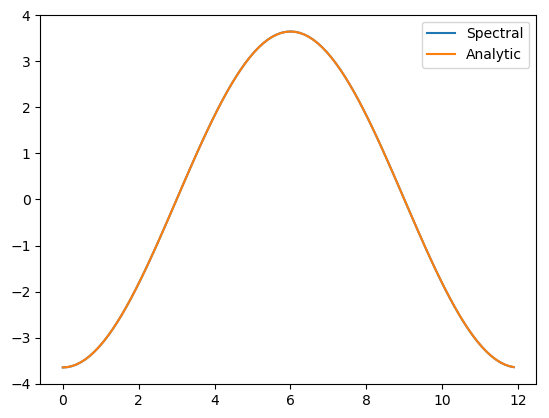

In [25]:
PyPlot.plot(z, ϕ, label="Spectral"); PyPlot.plot(z, ϕs, label="Analytic"); PyPlot.legend();

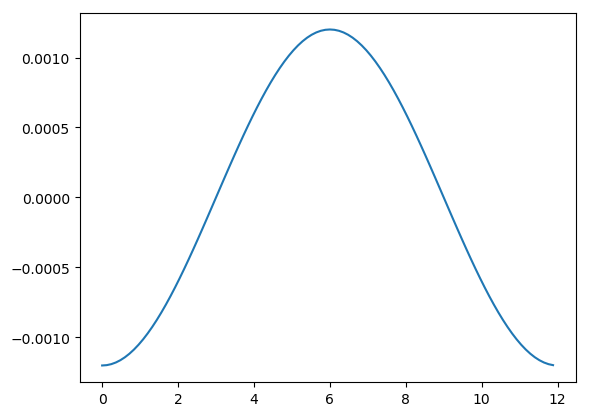

In [28]:
PyPlot.plot(z, ϕ - ϕa);

In [29]:
N = length(f)  # Number of grid points.

100

In [30]:
n = 0:(N-1)    # Wavenumber indices.

0:99

In [31]:
k² = @. (4 / Δz^2) * sin(π*n / N)^2  # Wavenumber squared.
@show size(f);
@show size(n);
@show size(k²);

size(f) = (100,)
size(n) = (100,)
size(k²) = (100,)


In [33]:
k²[1:Int(N/2 + 1)]

51-element Array{Float64,1}:
   0.0                
   0.27406549607339414
   1.0951803729891902 
   2.460104065459905  
   4.363449843245679  
   6.79770607011756   
   9.753265848853967  
  13.218464935275064  
  17.179627771685613  
  21.621121458053466  
  26.525417447923964  
  31.873160725584825  
  37.64324619147061   
   ⋮                  
 245.90461705219298   
 251.2523603298538    
 256.1566563197242    
 260.59815000609217   
 264.55931284250266   
 268.02451192892374   
 270.9800717076602    
 273.4143279345321    
 275.31767371231786   
 276.68259740478857   
 277.5037122817044    
 277.77777777777777   

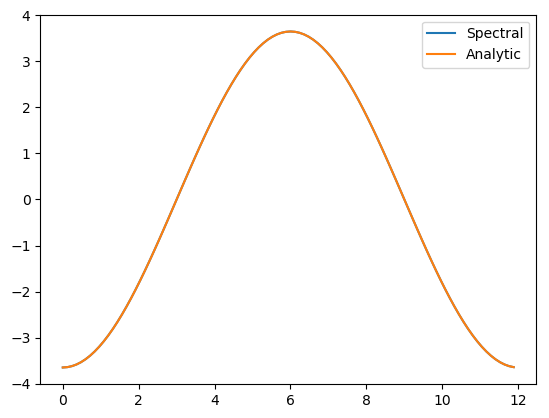

In [88]:
PyPlot.plot(z, solve_poisson_1d_pbc(f, Δz), label="Spectral"); PyPlot.plot(z, ϕs, label="Analytic"); PyPlot.legend();

In [91]:
using Statistics: mean
# minimum(solve_poisson_1d_pbc(f, Δz) - ϕs)
all(isapprox.(solve_poisson_1d_pbc(f, Δz), ϕs; atol=0.0015))

true

In [195]:
@doc ≈

```
isapprox(x, y; rtol::Real=atol>0 ? 0 : √eps, atol::Real=0, nans::Bool=false, norm::Function)
```

Inexact equality comparison: `true` if `norm(x-y) <= max(atol, rtol*max(norm(x), norm(y)))`. The default `atol` is zero and the default `rtol` depends on the types of `x` and `y`. The keyword argument `nans` determines whether or not NaN values are considered equal (defaults to false).

For real or complex floating-point values, if an `atol > 0` is not specified, `rtol` defaults to the square root of [`eps`](@ref) of the type of `x` or `y`, whichever is bigger (least precise). This corresponds to requiring equality of about half of the significand digits. Otherwise, e.g. for integer arguments or if an `atol > 0` is supplied, `rtol` defaults to zero.

`x` and `y` may also be arrays of numbers, in which case `norm` defaults to `vecnorm` but may be changed by passing a `norm::Function` keyword argument. (For numbers, `norm` is the same thing as `abs`.) When `x` and `y` are arrays, if `norm(x-y)` is not finite (i.e. `±Inf` or `NaN`), the comparison falls back to checking whether all elements of `x` and `y` are approximately equal component-wise.

The binary operator `≈` is equivalent to `isapprox` with the default arguments, and `x ≉ y` is equivalent to `!isapprox(x,y)`.

Note that `x ≈ 0` (i.e., comparing to zero with the default tolerances) is equivalent to `x == 0` since the default `atol` is `0`.  In such cases, you should either supply an appropriate `atol` (or use `norm(x) ≤ atol`) or rearrange your code (e.g. use `x ≈ y` rather than `x - y ≈ 0`).   It is not possible to pick a nonzero `atol` automatically because it depends on the overall scaling (the "units") of your problem: for example, in `x - y ≈ 0`, `atol=1e-9` is an absurdly small tolerance if `x` is the [radius of the Earth](https://en.wikipedia.org/wiki/Earth_radius) in meters, but an absurdly large tolerance if `x` is the [radius of a Hydrogen atom](https://en.wikipedia.org/wiki/Bohr_radius) in meters.

# Examples

```jldoctest
julia> 0.1 ≈ (0.1 - 1e-10)
true

julia> isapprox(10, 11; atol = 2)
true

julia> isapprox([10.0^9, 1.0], [10.0^9, 2.0])
true

julia> 1e-10 ≈ 0
false

julia> isapprox(1e-10, 0, atol=1e-8)
true
```

```
isapprox(x::FixedPoint, y::FixedPoint; rtol=0, atol=max(eps(x), eps(y)))
```

For FixedPoint numbers, the default criterion is that `x` and `y` differ by no more than `eps`, the separation between adjacent fixed-point numbers.


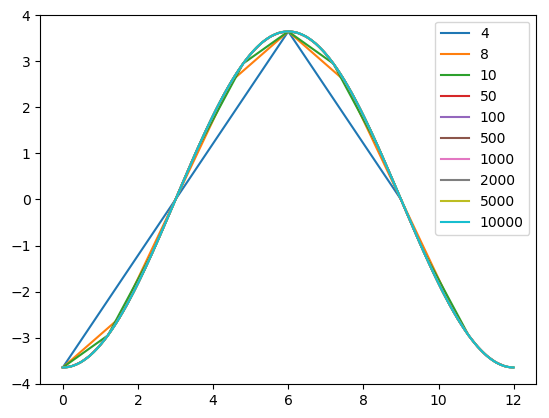

PyObject <matplotlib.legend.Legend object at 0x000000002FB872E8>

In [109]:
Ns = [4, 8, 10, 50, 100, 500, 1000, 2000, 5000, 10000]
error = []

for Nz in Ns
    H = 12           # Length of domain.
    Δz = H / Nz      # Grid spacing.
    z = Δz * (0:(Nz-1))  # Grid point locations.

    f = cos.(2*π*z ./ H)  # Source term.
    ϕa = @. -(H / (2π))^2 * cos((2π / H) * z)  # Analytic solution.

    ϕs = solve_poisson_1d_pbc(f, Δz)

    # Maximum error should be around 0.06.
    PyPlot.plot(z, ϕs, label=string(Nz));
    append!(error, maximum(abs.(ϕs - ϕa)))
end
PyPlot.legend()

In [110]:
error

10-element Array{Any,1}:
 4.440892098500626e-16 
 8.881784197001252e-16 
 3.774758283725532e-15 
 4.3298697960381105e-15
 4.3298697960381105e-15
 4.884981308350689e-15 
 4.884981308350689e-15 
 5.440092820663267e-15 
 4.6629367034256575e-15
 5.10702591327572e-15  

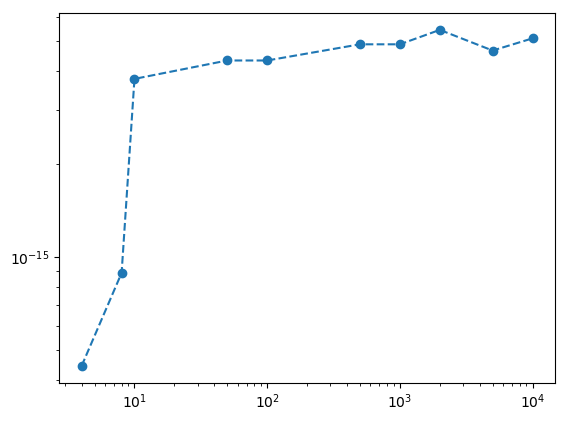

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002DC422E8>

In [107]:
PyPlot.loglog(Ns, error, linestyle="--", marker="o")

In [104]:
(log10(error[end]) - log10(error[1])) / (log10(Ns[end]) - log10(Ns[1]))

1.1239858344324658